In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
diabetes = pd.read_csv('dataset/C_std_diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [6]:
features = list(diabetes.columns[:-1])
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [11]:
 from sklearn.decomposition import PCA

def apply_pca(n):
    pca = PCA(n_components = n)
    x_new = pca.fit_transform(diabetes[features])
    
    return pca, pd.DataFrame(x_new)

pca_obj, _ = apply_pca(8)
print("explained variance: ", pca_obj.explained_variance_ratio_)

sum(pca_obj.explained_variance_ratio_)

explained variance:  [0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


0.9999999999999999

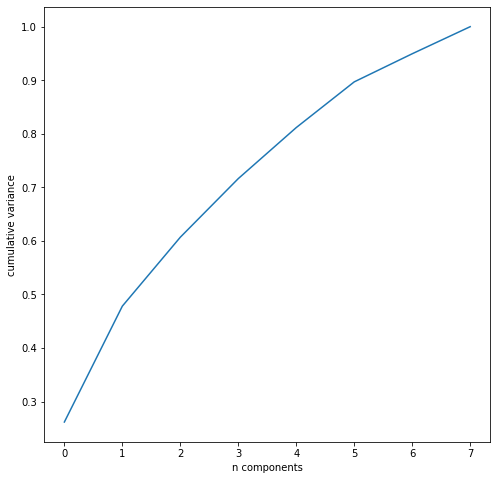

In [13]:
plt.figure(figsize = (8,8))
plt.plot(np.cumsum(pca_obj.explained_variance_ratio_))
plt.xlabel("n components")
plt.ylabel("cumulative variance")
plt.show()

In [16]:
Y = diabetes['Outcome']

_, X_new = apply_pca(4)
X_new.sample(10)

,0,1,2,3
9,-1.839850,3.206661,0.660732,-0.377021
601,-3.172570,0.122268,1.591560,-0.437728
275,0.987937,-1.655972,-1.034457,0.891473
365,-0.205729,-0.428441,-0.086325,0.331396
282,0.667397,1.024077,-0.324877,-0.767467
277,-0.672457,-1.429148,0.081575,-0.132851
261,-1.922199,-0.505675,2.713511,0.395447
536,-0.968230,0.841192,-0.891434,-0.268053
158,-1.087134,-0.833312,-0.917782,-0.236010
744,2.942000,1.429876,0.402203,1.585401


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size= 0.2)

In [22]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(solver= 'liblinear').fit(x_train, y_train)

y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy_score(y_test, y_pred)

0.7207792207792207

In [26]:
recall_score(y_test, y_pred)

0.42105263157894735

In [28]:
precision_score(y_test, y_pred)

0.7058823529411765